## Supervised Learning
## Project: Finding Donors for *CharityML*

In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## PYTHON VERSION - 3

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

#Calculating the frequency of each income category
income_counts = data['income'].value_counts().to_dict()

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = income_counts['>50K']

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = income_counts['<=50K']

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))




print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))


Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

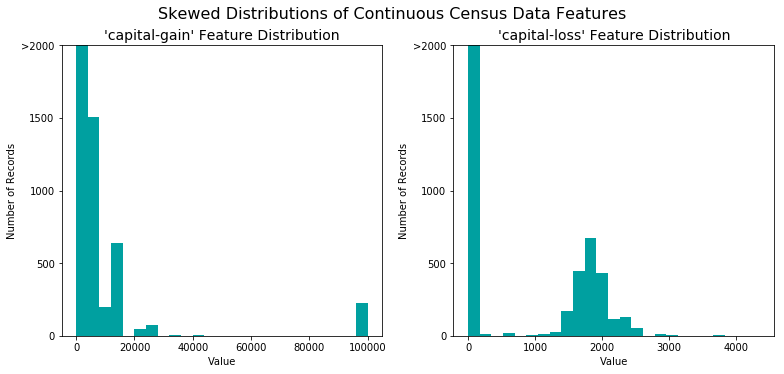

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

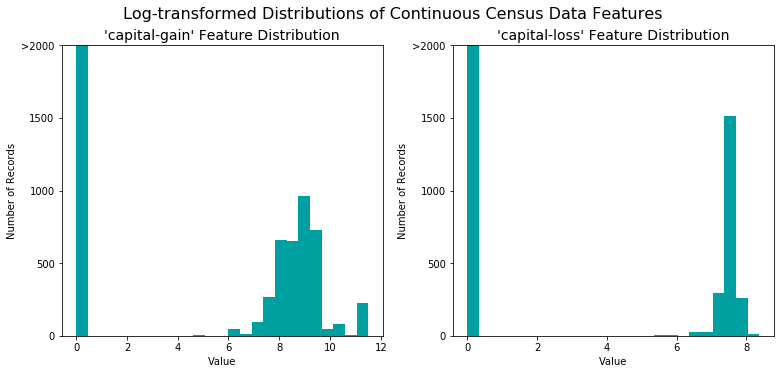

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

#print(features_final)

# TODO: Encode the 'income_raw' data to numerical values

#Using map() 

'''
encode = lambda x: 0 if x == '<=50K' else 1
income = income_raw.map(encode)
'''


#using replace()


encode = { "<=50K": 0, ">50K": 1 }
income = income_raw.replace(encode)



print(income.head(n=20))

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     1
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    1
Name: income, dtype: int64
103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spou

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [8]:

TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP/(TP+FP)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.

beta = 0.5
fscore = (1+(beta**2))*((precision*recall)/((beta**2)*precision+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

 **Answer: ** 

The Supervised Learning Models chosen for solving the Finding Donors for CharityML problem are -

1. Logistic Regression.
2. Ensemble Methods.
3. Stochastic Gradient Descent Classifier.


## 1. Logistic Regression:
    
Real-World Applications -
    
1. Image Segmentation and Categorization

2. Geographic Image Processing

3. Handwriting recognition

4. Healthcare : Analyzing a group of over million people for myocardial infarction within a period of 10 years is an application area of logistic regression.
    
    
Strengths-
       
1. It is easy to understand and interpret.
       
2. It is very easy to train the model and takes very little time.
        
    
Weaknesses-
       
1. It changes its behavior drastically when the training data has outliers.
        
2. This model has no concept of error.
        
3. They tend to overfit if the input labels are highly correlated.
    
Advantages in using this model for Finding Donors CharityML problem-
    
1. All census data conform to a particular pattern and such patterns can be easily classified. Hence, the logistic regression model can perform very well given that it is a statistical model.

2. It doesn't take much time to train the model even for very large datasets which is becomes an issue if there is a time constraint placed on the algorithm.



## 2. AdaBoost:
    
Real-World Applications-

1. AdaBoost Classifier is used in Haar image classifiers for facial recognition technologies.

2. They are used in commercial softwares to detect select objects.

3. It is widely used in the medicine field to detect and analyse X-ray images.

Strengths-    

1. When used in conjunction with Decision Tree qualifiers, the information gained at each stage is used to feed input to complex-tree growing algorithms which is useful in solving more hard problems.

2. A very strong learner can be obtained from base weak learners and this is useful in the sense that the weak learners can be tweaked to reduce the classification error and hence, this model is very extensible.

3. It is less susceptible to overfitting than other models.

Weaknesses-

1. Its sensitive to noisy data and outliers.

2. Optimal solution not guranteed always.

Advantages in using this model for Finding Donors CharityML probelm-

1. Since it is not okay to have classification errors, we need to have some penalty for the misclassified points. AdaBoost provides this and therefore can give very accurate models.

2. It requires less no. of iterations to solve the classification problem because it requires less no. of parameters to tweak. This is suitable in this case because we have a lot of features here.

## 3. Gradient Boosting:
    
Real-World Applications -

1. Gradient Boosting is widely used in page-ranking algorithms of major web commercial giants like Yahoo and Yandex.

2. In the field of medicine, Gradient Boosting is used in the form of intelligent medical sensors that can correctly classify human activities which helps reduce noise from physiological signals.

Strengths-

1. It naturally handles data of mixed type.

2. It's predictions are very accurate because of its robustness to outliers in output space (via robust loss functions)

3. Using loss functions and finding its derivatives, we can optimise the model and reduce the error rate.

4. It gives a lot of room to tune its paramters according to our needs.

5. Using regulariztion, we can impose restrictions to reduce high variance to fit the model well.

Weaknesses-

1. It is very sensitive to feature scaling. Because of the serial nature of boosting, it hardly can be serialised, resulting in long training periods.

Advantages in using this model for Finding Donors CharityML probelm-

1. The accuracy of the model never wavers even in the presence of maligned data. Since a census may never be accurate because of issues like human error, it is highly adaptible to outliers and does not affect the overall model. 

2. Usually all census data follow a pattern. This dataset will be no different. Hence, it will be better if we find a proper error function that has nice derivatives then we can develop a model with high accuracy but also bounds the probelm with linear constraints. This makes it simple yet efficient.

3. This model is highly customisable. We can add regularizations, penalties to reduce the no. of misclassified points, and also have a balanced tree structure by mentioning constraints like "max-depth", "min-samples-per-node" etc. This helps us to reduce high-variance.


References -


1. http://scikit-learn.org/stable/supervised_learning.html#supervised-learning
2. https://machinelearningmastery.com/
3. https://en.wikipedia.org/


### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score



def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    

    
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
    
    # Success
    print("\n\n{}:\n F-score:  {:.4}.".format(learner.__class__.__name__,results['f_test']))
    print("\nAccuracy of {:.4} on training set and {:.4} on test set.".format(results['acc_train'],results['acc_test']))
    print("\n{} trained on {} samples.".format(learner.__class__.__name__,sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!



LogisticRegression:
 F-score:  0.6289.

Accuracy of 0.86 on training set and 0.8187 on test set.

LogisticRegression trained on 361 samples.


LogisticRegression:
 F-score:  0.6775.

Accuracy of 0.8467 on training set and 0.8386 on test set.

LogisticRegression trained on 3617 samples.


LogisticRegression:
 F-score:  0.6832.

Accuracy of 0.8467 on training set and 0.8419 on test set.

LogisticRegression trained on 36177 samples.


AdaBoostClassifier:
 F-score:  0.6328.

Accuracy of 0.8933 on training set and 0.8207 on test set.

AdaBoostClassifier trained on 361 samples.


AdaBoostClassifier:
 F-score:  0.7019.

Accuracy of 0.84 on training set and 0.8499 on test set.

AdaBoostClassifier trained on 3617 samples.


AdaBoostClassifier:
 F-score:  0.7246.

Accuracy of 0.85 on training set and 0.8576 on test set.

AdaBoostClassifier trained on 36177 samples.


GradientBoostingClassifier:
 F-score:  0.6599.

Accuracy of 0.94 on training set and 0.8314 on test set.

GradientBoostingClassi

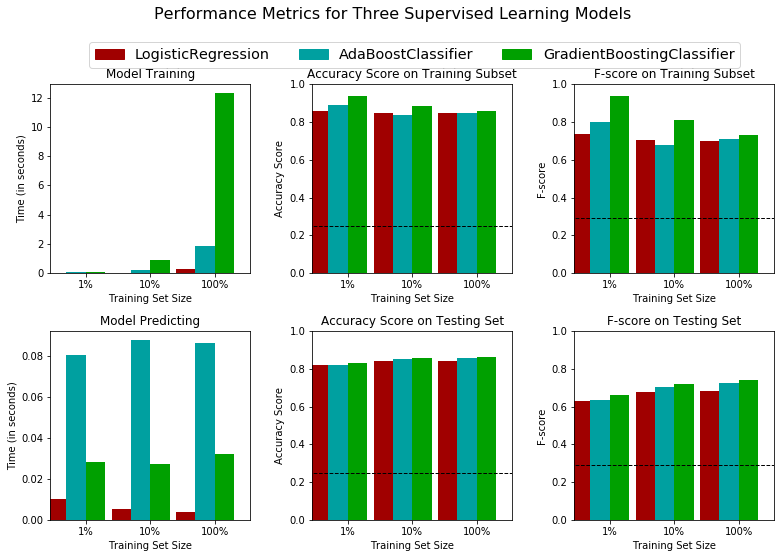

In [10]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


# TODO: Initialize the three models

clf_A = LogisticRegression(random_state=42)

clf_B = AdaBoostClassifier(random_state=42)

clf_C = GradientBoostingClassifier(random_state=42)



# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)

samples_100 = len(y_train)
samples_10 = (int)(samples_100/10)
samples_1 = (int)(samples_100/100)

# Collect results on the learners
results = {}

#TODO: 3rd model not working properly please check it out,dyan....
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: ** 

Metrics-

1. The Gradient Boosting Classifier has secured the highest F-Score amongst the chosen algorithms on testing when 100% of the given training data was used to train the models. 

2. Gradient Boosting 86.3% accuracy on the testing set after we have used the full training set. Also we can notice that there is a pattern in the accuracy rate as well with respect to the size of training set used. As the training set increases in size, the accuracy attribute also has risen accordingly. This is an another factor that indicates the fact that the model is becoming more and more accurate when we use large training sets.

Time-

1. The model takes about 11.2s to successfully train and about 0.025s to make a well-educated prediction.  This clearly indicates that the intelligence of this classifeir increases when we train it more. That is in plain terms, it gets smarter as we train it harder. 

2. As expected, the training time required increases as the size of the dataset increases. But comparatively, the Gradient Boosting classifier takes much more time to train. From the graph, we can see that the AdaBoost classifier has taken only 1.93s to complete its training whereas the Gradient Boosting needed 11s to do so. This is large training time is only due to the iterative manner in which the algorithm uses its weaak learners to build a string learner.But there is one interesting thing though. Gradient Boosting has surpassed AdaBoost in predicting values quickly. AdaBoost has taken 0.93s whereas Gradient Boosting has managed to do it in 0.025s. This clearly indicates the quality of the model.

Algorithm's Suitability for the Data- 

1. Admittedly this model takes much longer to train with respect to others. But in our given problem statement, there is no need for a hard deadline. A time constraint isn't necessary in this case. So we can accept a reasonable training time anywhere in the span of seconds. Finding donors can be done at any given momemnt using the software and there is no strict schedule. Therefore, this quality of the problem at hand reinforces the suitability of the chosen algorithm.  

2. Since errors are intolerable in this classification problem, we can add appropriate error functions and regularizations to penalise the model for misclassification of points. This way the model tends to give correct predictions most of the time.
   

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

## What is a Classifier?

Classifier is an algorithm, a technicque that takes a bunch of data and learn from the data and make predictions about the class of a new data.


## What is Boosting?

Boosting is an algorithm that uses different classifiers to build a more stronger one. The original algorthms are called weak learners and the resultant combined one is called a strong learner.


## What is Gradient Boosting?

Gradient Boosting is an algorithm that uses different weights for different weak learners based on their accuracies to combine them into one strong learner.


## How does Gradient Boosting work?

### Stage 1:

The algorithm takes a sample of the training dataset and tests to see how accurate each learner is. We find the best learner. In addition, samples that are misclassified are given a heavier weight, so that they have a higher chance of being picked in the next round. Then, the best learner is also given a weight depending on its accuracy and incorporated into the ensemble of learners. There is only one learner at the beginning.

### Stage 2: 

Gradient Boosting again attempts to look for the best learner. The sample of patient training data is now influenced by the more heavily misclassified weights. In other words, previously misclassified patients have a higher chance of showing up in the sample. 

Here's the explanation -

It’s like getting to the second level of a video game and not having to start all over again when your character is killed. Instead, you start at level 2 and focus all your efforts on getting to level 3.
Likewise, the first learner likely classified some patients correctly. Instead of trying to classify them again, let’s focus all the efforts on getting the misclassified patients. The best learner is again weighted and incorporated into the ensemble, misclassified patients are weighted so they have a higher chance of being picked and we rinse and repeat.



### After N rounds: 

We’re left with an ensemble of weighted learners trained and then repeatedly retrained on misclassified data from the previous rounds. This model is now expected to be highly accurate.

### Interesting Analogy - 

Take a group of superheroes, Mr.Brainy McCoy, The Flash, Superman. Suppose they are asked to fight a villainous, an invincible monster. To defeat the monster we need lightning speed, superhuman power, and a high level of intelligence. The monster can't be defeated individually by any of the superheros. But the combined together they may have a chance. So now, we will see how Gradient Boosting works. 

1.Gradient Boosting sees which superhero is the strongest, most likely to defeat the enemy. It chooses Mr.Brainy McCoy. After all, intelligence is the most powerful weapon in any armory. But the monster defeats him. He was completely outpowered even though he has great strategies. So he needs someone who had extraordinary power.

2.Now Gradient Boosting, sees that McCoy needs more firepower. So it chooses the strongest superhero from the available ones. It chooses Superman. Now, Superman and McCoy together fight the enemy. But, oh, the monster just got away in the nick of time. It seems that we need someone who is superfast.

3.In the next stage, Gradient Boosting clearly understands that the superheroes need some speed. So it approaches the Flash and asks for his help. Flash agrees and he joins the superheroes. They fight the enemy and this time, yay, they win and put the monster back in jail.


And that's how Gradient Boosting works.



### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [11]:
#### TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import fbeta_score,make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Initialize the classifier

clf = GradientBoostingClassifier(random_state=42)


# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate' : [0.1,0.375,0.65,1], 'n_estimators': [200,300,400], 'max_depth': [4,5] }
              
#  'n_estimators': [100,200,300,400],
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8630
F-score on testing data: 0.7395

Optimized Model
------
Final accuracy score on the testing data: 0.8727
Final F-score on the testing data: 0.7562


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8630         |   0.8727        |
| F-score        |    0.7395         |   0.7562        |


**Answer: ** 

1.The accuracy and f-scores of the optimized model have increased by a little amount as we can see from the above table. The parameters that were fine-tuned are the learning rate and the no. of estimators(the no. of trees used for learning) using a GridSearchCV object. 

2.The Naive Predictor had an Accuracy score of 0.2478 and a F-score of 0.2917. Our improved model has an accuracy of 0.87 and a f-score of 0.75. This shows that the base values of the Naive Predictor are just only a benchmark that can be improved by choosing an appropriate classifier which cfurther can be made more efficient by tuning its parameters. Naive Predictor is only an useful indicator of how well a model can be improved. This we saw after we trained a Gradient Boosting Classifier which almost 3 times as better as the Naive Predictor. Our model has indeed fared better by a large margin(300%).

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

Features that are important for predictiion-(in decreasing order of precedence)

        1.Education
        2.Age 
        3.Capital Gain 
        4.Capital Loss 
        5.Profession 

Explanation-

Well, the above answer can be easily arrived at after a moment's thought. To have a good business or career, one must be highly educated. Education provides a person with all the facilities to pursue a career in any field. There are however exceptions if a person gets into a field without any prior experience and still succeed. This happens in family businesses. So logically, the next deciding factor of a person's wealth status is his/her age. Because not all persons in the age spectrum have an income in 5 digits. Examples include students, children, toddlers etc can't be expected to have that sort of money. Only busines persons who have been in their respective fields for some considerable amount of time could possibly be wealthy. This shows that age is definintely a factor. Next we can look at the person's profession. It's only common sense that we include profession in this list. Profesions like business, sports, actors, bankers will surely have a good financial background. Also we can tell that people with regular day-jobs will not be enthusiastic in donating fifty grand. Hence, profession is a necessary field to determine a peron's financial ability. Next in line comes the capital-loss and capital-gain features. They are both equally indicative of a person's financial status. The fact that a person has a good capital-gain clearly tells that he currently has a good career and he is expected to attain higher levels of financial status and will probably be a philanthropist in the future. Similarly, capital-loss feature tells how badly a person is running his business which makes it easier for a classifier to decide if that person is capable of donating fifty grand or more. The above discussion sure does have some exceptions in each field but their numbers are very low and hence can be safely excluded out of our rationale.


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

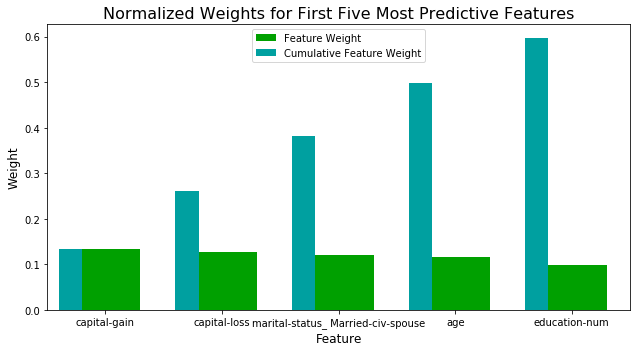

In [12]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:** 

1.By using the above technicque it is seen that the five features that are important to make a decision are education, age, marital-status, capital-loss or gain in decreasing order of importance.
The features that I guessed were almost the same as the calculated ones except for the marital status feature. 

2.As I guessed, education was the most important feature of all and it is what that has weighed the largest in the model as shown in the graph. The age factor was also accounted for in my prediction and it has come second in the important feature list. Age is a decisive factor because most succesful people are middle-aged with a very good educational background. My idea that capital-loss and capital-gain were also required to make a well-informed decision was confirmed by the above visualisation. The fact that a person has a appreciable value in those two features indicate that the person is certainly employed in a business that is currently active.

3.However, the only thing that I apparently missed out on is the importance of the marital-status feature specifcally the one that tells if that person is a spouse or not. Now that I think about it, I realise that marital status does indicate in a way if a person has a decent income or not. A person should be able to provide for his family and therfore he or she should have some security for their future and this they cannot have if they are not having some form of living with a decent pay. A well settled person with a family to take care of and who is expected to look after the children and spend for their expenses will not be a cheap task. Such a person cannot be unemployed or financially deficit. In that manner, the marital status feature that indicates whether a person is married and is a spouse is an important feature to consider in predicting a person's income. A family man should have a decent income. Hence, chances are that he/she has a good income.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [13]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
start = time()
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end = time()

print("New Training Time:", end - start,"s.")

# Make new predictions
start = time()
reduced_predictions = clf.predict(X_test_reduced)
end = time()

print("New Prediction Time:", end - start,"s.")

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

New Training Time: 6.118610858917236 s.
New Prediction Time: 0.05393075942993164 s.
Final Model trained on full data
------
Accuracy on testing data: 0.8727
F-score on testing data: 0.7562

Final Model trained on reduced data
------
Accuracy on testing data: 0.8572
F-score on testing data: 0.7217


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:** 

1.The final model's F-score and accuracy score have droppped a little bit. This is a direct consequence of the limited no. of input variables available for the model to predict the output variable. When trained with full features, the model has performed really well with a bit more accuracy and precision. 

But there is a catch. This model which was trained only using 5 features has significantly reduced training time of 6s whereas it took 11s to train the model with the full feature set. This enables us to train even more large datasets in a small peroid of time. This helps us to make our model even smarter.

2.If training time was indeed a factor, then, yes, I would use the reduced data set for training my model. Because from what I gather a small decrease in accuracy (1.4%) is a modest trade off for very small training time. Very small training time is beneficial in the longer run. When especially, we need to train a large no. of models on very large datasets with very limited resources. Under that constraint, a slighlty less accurate model is far more better than no model at all. Moreover we can make up for that dip in accuracy by using cross-validation for the model evaluation.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Before You Submit
You will also need run the following in order to convert the Jupyter notebook into HTML, so that your submission will include both files.

In [15]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 494076 bytes to finding_donors.html']